# Predicting Game Newsletter Subscriptions Using Player Playtime and Experience Level Data

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(dplyr)
options(repr.matrix.max.rows = 6)
library(ggplot2)
set.seed(1)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

# 1. Introduction

## 1.1 Background Information

A research video game server created by Frank Wood and his research team at UBC aimed to collect data both in game about participant gameplay sessions, as well as external participant traits. A survey was taken by research participants prior to their playing sessions and this data has been collected into the players.csv file. 

## 1.2 Questions

#### ***Broad question:*** 
What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

#### ***Specific question:*** 
Can experience level and play time predict subscription in the players.csv dataset? 



## 1.3 Dataset description
The dataset 'players.csv' describes 196 unique players, including data about each player.
Numbers of observations: 196,
numbers of variables: 7

|Variable     |   Type    |     Description  |
|-------------|-----------|------------------------------|
|experience   | Character |Player's experience level|
|hashedEmail  | Character |Player's ID|
|name         | Character |  Player's name               |
|gender       | Character  | Player's gender|
|played_hours | Double      |Player's playtime (in hours)|
|Age           |Double     | Player's age|
|subscribe     |Logical     |Whether the player subscribed to the newsletter|


# 2. Methods & Results
## 2.1 Data Loading

In [2]:
players <- read_csv("https://raw.githubusercontent.com/JLin4115/gp_dsci_17/refs/heads/main/data/players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


## 2.2 Wrangling Data
The variable experience is orginally character strings. To use it in classification models, we first convert it to a factor, and then convert the factor to numeric values. Also, we select only relevant variables (experience, playtime, and subscription) for the planned analysis. 

In [3]:
players_clean <- players |>
    mutate(experience = as.numeric(as.factor(experience))) |>
    select(experience, played_hours, subscribe)
players_clean

experience,played_hours,subscribe
<dbl>,<dbl>,<lgl>
3,30.3,TRUE
5,3.8,TRUE
5,0.0,FALSE
⋮,⋮,⋮
1,0.0,FALSE
1,2.3,FALSE
3,0.2,TRUE


|1|2|3|4|5|
|---|---|----|--|--|
|Amateur|Beginner|Pro|Regular|Veteran|

## 2.3 Summary Statistics

|     |min|mean|max|
|----|-----|-------|----|
|played_hours|0.000|5.900|223.100|
|experience|1.000|2.852|5.000|

## 2.4 Visualization
### 2.4.1 Experience vs Subscription Rate

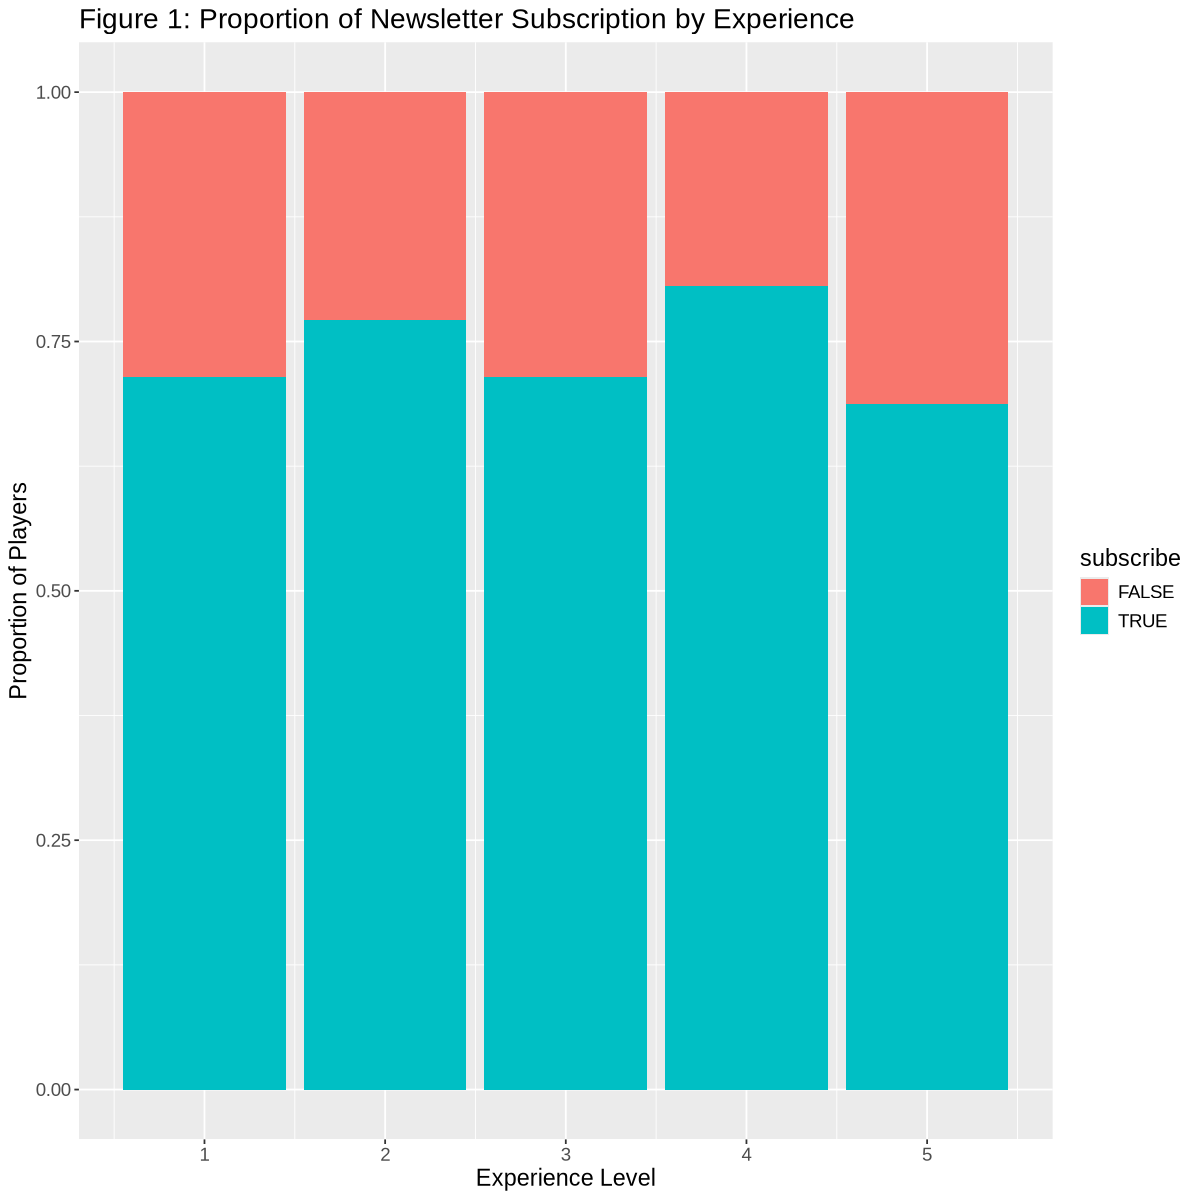

In [13]:
ggplot(players_clean, aes(x=experience, fill = subscribe)) +
    geom_bar(position="fill") +
    theme(text = element_text(size = 14)) +
    labs(title = "Figure 1: Proportion of Newsletter Subscription by Experience", x = "Experience Level", y = "Proportion of Players")

## 2.4.2 Played hours by subscription status

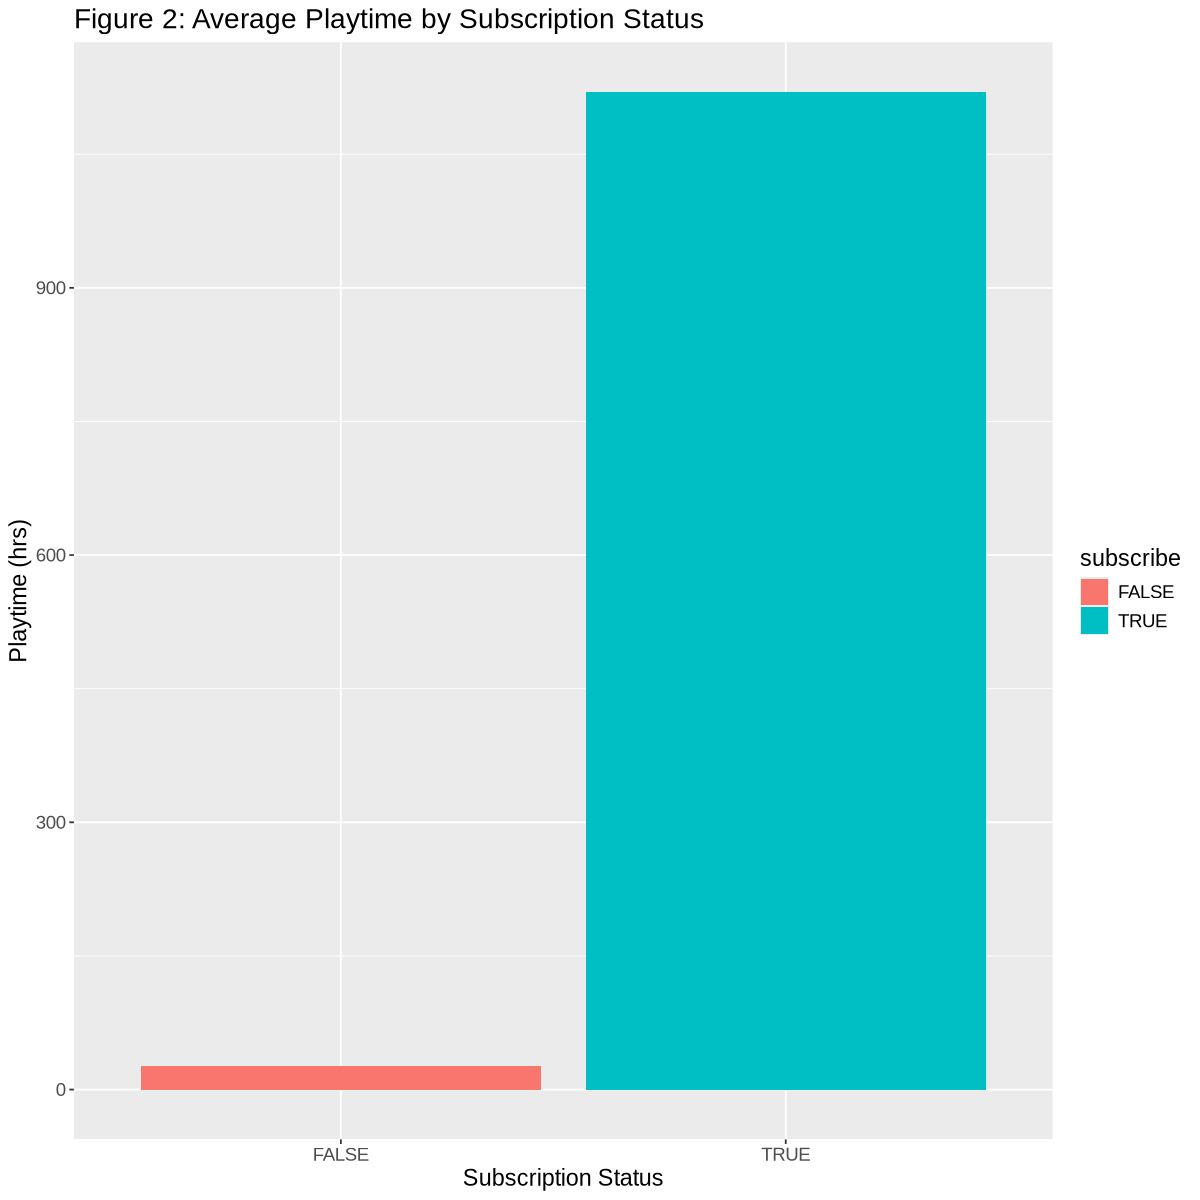

In [12]:
ggplot(players_clean, aes(x=subscribe, y = played_hours, fill = subscribe)) +
    geom_bar(stat = "identity") +
    theme(text = element_text(size = 14)) +
    labs(title = "Figure 2: Average Playtime by Subscription Status", x = "Subscription Status", y = "Playtime (hrs)")

## 2.5 Data Analysis

# 3. Discussion

# 4. References